In [1]:
# Importing packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

from os import path 

import sys

import tensorflow

from tensorflow.python.eager.context import num_gpus
sys.path.append("../..")
from DexterousManipulation.training.data_loader import load_reachable_from_data_set, load_all_from_data_set, load_filtered_data
from DexterousManipulation.training.custom_data_loader import load_rand_seq_data_rand_redraw, load_filtered_class_data

from mpl_toolkits import mplot3d # For 3D plotting 

from matplotlib.patches import Rectangle

In [2]:
# Misc Hyper-parameters 
apply_one_hot_encoding = False 
num_bins = 100 # for histogram 
num_samples_per_class = 500000    # 500K samples per class 

# Base path
basepath = path.abspath('')

# Folders where the raw class data is located 
data_set_folder_big_cube = "DATA_SET_BIG_CUBE"
data_set_folder_medium_cube = "DATA_SET_MEDIUM_CUBE"
data_set_folder_small_cube = "DATA_SET_SMALL_CUBE"
data_set_folder_cyli = "DATA_SET_CYLINDER"

# Folders in which the respective class data analysis information is saved 
folder_saving_str_big_cube = path.abspath(path.join(basepath, "..", "Figures/Data/500k_Data_Set/BIG_CUBE" ))
folder_saving_str_medium_cube = path.abspath(path.join(basepath, "..", "Figures/Data/500k_Data_Set/MEDIUM_CUBE" ))
folder_saving_str_small_cube = path.abspath(path.join(basepath, "..", "Figures/Data/500k_Data_Set/SMALL_CUBE" ))
folder_saving_str_cyli = path.abspath(path.join(basepath, "..", "Figures/Data/500k_Data_Set/CYLINDER" ))

folder_saving_str_general = path.abspath(path.join(basepath, "..", "Figures/Data/500k_Data_Set" ))

In [3]:
# Loading data for big cube 
filtered_metrics_big_cube, filtered_hand_infos_big_cube, time_taken_big_cube = load_filtered_class_data(
                                                                                    folder_name = data_set_folder_big_cube,
                                                                                    nb_samples = num_samples_per_class)

# Loading time 
print("Time needed to load the data (in seconds) for the big cube: ", time_taken_big_cube)
# Displaying total number of samples 
print("Number of loaded samples for big cube", len(filtered_metrics_big_cube))

Time needed to load the data (in seconds) for the big cube:  31.045089721679688
Number of loaded samples for big cube 500000


In [4]:
# Loading data for medium cube 
filtered_metrics_medium_cube, filtered_hand_infos_medium_cube, time_taken_medium_cube = load_filtered_class_data(
                                                                                    folder_name = data_set_folder_medium_cube,
                                                                                    nb_samples = num_samples_per_class)

# Loading time 
print("Time needed to load the data (in seconds) for the big cube: ", time_taken_medium_cube)
# Displaying total number of samples 
print("Number of loaded samples for big cube", len(filtered_metrics_medium_cube))

Time needed to load the data (in seconds) for the big cube:  25.007534742355347
Number of loaded samples for big cube 500000


In [5]:
# Loading data for small cube 
filtered_metrics_small_cube, filtered_hand_infos_small_cube, time_taken_small_cube = load_filtered_class_data(
                                                                                    folder_name = data_set_folder_small_cube,
                                                                                    nb_samples = num_samples_per_class)

# Loading time 
print("Time needed to load the data (in seconds) for the small cube: ", time_taken_small_cube)
# Displaying total number of samples 
print("Number of loaded samples for small cube", len(filtered_metrics_small_cube))

Time needed to load the data (in seconds) for the small cube:  12.239855766296387
Number of loaded samples for small cube 500000


In [6]:
# Loading data for cylinder
filtered_metrics_cyli, filtered_hand_infos_cyli, time_taken_cyli = load_filtered_class_data(
                                                                                    folder_name = data_set_folder_cyli,
                                                                                    nb_samples = num_samples_per_class)

# Loading time 
print("Time needed to load the data (in seconds) for the cylinder: ", time_taken_cyli)
# Displaying total number of samples 
print("Number of loaded samples for cylinder", len(filtered_metrics_cyli))

Time needed to load the data (in seconds) for the cylinder:  25.134496212005615
Number of loaded samples for cylinder 500000


In [7]:
# Multiplying metrics by 100, as cm are more readable
for index in range(num_samples_per_class): 
    filtered_metrics_big_cube[index] = filtered_metrics_big_cube[index] * 100 
    
for index in range(num_samples_per_class): 
    filtered_metrics_medium_cube[index] = filtered_metrics_medium_cube[index] * 100 

for index in range(num_samples_per_class): 
    filtered_metrics_small_cube[index] = filtered_metrics_small_cube[index] * 100 
    
for index in range(num_samples_per_class): 
    filtered_metrics_cyli[index] = filtered_metrics_cyli[index] * 100 

In [8]:
# Adding 1 cm to J to have the real distance between joints 
for index in range(num_samples_per_class): 
    filtered_metrics_big_cube[index] = filtered_metrics_big_cube[index] + 1.0
    
for index in range(num_samples_per_class): 
    filtered_metrics_medium_cube[index] = filtered_metrics_medium_cube[index] + 1.0

for index in range(num_samples_per_class): 
    filtered_metrics_small_cube[index] = filtered_metrics_small_cube[index] + 1.0 
    
for index in range(num_samples_per_class): 
    filtered_metrics_cyli[index] = filtered_metrics_cyli[index] + 1 

In [12]:
# Function used to filter out specific infos
def fetch_info(metrics, hand_infos): 
    # Fetching x, y  and z positions of the hand for that class 
    # Multiplying all positions by 100, as cm are more readable
    x_positions = [] 
    y_positions = [] 
    z_positions = []
    for index in range(len(hand_infos)): 
        x_positions.append(hand_infos[index][0]* 100 )
        y_positions.append(hand_infos[index][1]* 100 )
        z_positions.append(hand_infos[index][2]* 100 )

    # Fetching distances 
    distances = [] 
    long_dist = []
    non_zero_x = [] 
    non_zero_y = [] 
    non_zero_z = [] 
    for index in range(len(metrics)): 
        distances.append(metrics[index])
        # if metrics[index] > 0.1: 
        if metrics[index] > 1.1: 
            long_dist.append(metrics[index])
            non_zero_x.append(hand_infos[index][0]* 100 )
            non_zero_y.append(hand_infos[index][1]* 100 )
            non_zero_z.append(hand_infos[index][2]* 100 )

    return x_positions, y_positions, z_positions, distances, long_dist, non_zero_x, non_zero_y, non_zero_z

In [13]:
# Big cube
x_pos_big_cube, y_pos_big_cube, z_pos_big_cube, dist_big_cube, long_dist_big_cube, non_zero_x_big_cube, non_zero_y_big_cube, non_zero_z_big_cube = fetch_info(filtered_metrics_big_cube, filtered_hand_infos_big_cube) 
# Medium cube
x_pos_medium_cube, y_pos_medium_cube, z_pos_medium_cube, dist_medium_cube, long_dist_medium_cube, non_zero_x_medium_cube, non_zero_y_medium_cube, non_zero_z_medium_cube = fetch_info(filtered_metrics_medium_cube, filtered_hand_infos_medium_cube) 
# Small cube 
x_pos_small_cube, y_pos_small_cube, z_pos_small_cube, dist_small_cube, long_dist_small_cube, non_zero_x_small_cube, non_zero_y_small_cube, non_zero_z_small_cube = fetch_info(filtered_metrics_small_cube, filtered_hand_infos_small_cube) 
# Cylinder
x_pos_cyli, y_pos_cyli, z_pos_cyli, dist_cyli, long_dist_cyli, non_zero_x_cyli, non_zero_y_cyli, non_zero_z_cyli = fetch_info(filtered_metrics_cyli, filtered_hand_infos_cyli) 

In [107]:
from pandas import DataFrame

In [108]:
res = 200 

In [109]:
# Custom annotations XY
xy_ticks_xy_coord = []
xy_ticks_xy_coord.append("-2.0")

for _ in range(49): 
    xy_ticks_xy_coord.append("")
    
xy_ticks_xy_coord.append("-1.0")

for _ in range(49): 
    xy_ticks_xy_coord.append("")
    
xy_ticks_xy_coord.append("0")


for _ in range(49): 
    xy_ticks_xy_coord.append("")
    
xy_ticks_xy_coord.append("1.0")

for _ in range(48): 
    xy_ticks_xy_coord.append("")
    
xy_ticks_xy_coord.append("2.0")


In [110]:
# Custom annotations z 
y_ticks_z_coord = [] 
y_ticks_z_coord.append("11")

for _ in range(39): 
    y_ticks_z_coord.append("")
    
y_ticks_z_coord.append("12")

for _ in range(39): 
    y_ticks_z_coord.append("")
    
y_ticks_z_coord.append("13")

for _ in range(39): 
    y_ticks_z_coord.append("")
    
y_ticks_z_coord.append("14")

for _ in range(39): 
    y_ticks_z_coord.append("")
    
y_ticks_z_coord.append("15")

for _ in range(38): 
    y_ticks_z_coord.append("")
    
y_ticks_z_coord.append("16")


In [111]:
# Custom annotations J
ticks_J = [] 
ticks_J.append("1")

for _ in range(49): 
    ticks_J.append("")
    
ticks_J.append("2")

for _ in range(49): 
    ticks_J.append("")
    
ticks_J.append("3")

for _ in range(49): 
    ticks_J.append("")
    
ticks_J.append("4")

for _ in range(48): 
    ticks_J.append("")
    
ticks_J.append("5")

In [164]:
best_font_size = 18

# Plotting Joint distance wrt. to X 

Defining the function 

In [197]:
def plot_JX(X, J, colorscheme, folder_saving_str): 
   
    heatmap_test = np.zeros((res,res))
    for tmp_id in range(len(X)):
        tmp_pos_x_heatmap = int((X[tmp_id] + 2) * (res/4))
        tmp_pos_y_heatmap = int((J[tmp_id] - 5) * (res/4))
        heatmap_test[tmp_pos_y_heatmap,tmp_pos_x_heatmap] += 1 
        
    df = DataFrame(heatmap_test, index=ticks_J, columns=xy_ticks_xy_coord)
        
    plt.figure(figsize=(8, 6), dpi=100)
    TEST = plt.pcolor(df, cmap=colorscheme)
    
    plt.yticks(np.arange(0.5, len(df.index), 1), df.index, Fontsize = best_font_size)
    plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, Fontsize = best_font_size)
    cbar = plt.colorbar(TEST)
    cbar.ax.tick_params(labelsize=best_font_size)
    
    plt.xlabel("x-coordinate", Fontsize = best_font_size)
    plt.ylabel("Joint distance", Fontsize = best_font_size)
    plt.savefig(folder_saving_str+ "/Heatmap_TX.png")
    plt.show()

# Plotting X wrt. to Y

Defining the function 

In [198]:
def plot_XY(X, Y, colorscheme, folder_saving_str): 
    heatmap_test = np.zeros((res,res))
    for tmp_id in range(len(X)):
        tmp_pos_x_heatmap = int((X[tmp_id] + 2) * (res/4))
        tmp_pos_y_heatmap = int((Y[tmp_id] + 2) * (res/4))
        heatmap_test[tmp_pos_y_heatmap,tmp_pos_x_heatmap] += 1 
        
    df = DataFrame(heatmap_test, index=xy_ticks_xy_coord, columns=xy_ticks_xy_coord)
        
    plt.figure(figsize=(8, 6), dpi=100)
    TEST = plt.pcolor(df, cmap=colorscheme)
    plt.yticks(np.arange(0.5, len(df.index), 1), df.index, Fontsize = best_font_size)
    plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, Fontsize = best_font_size)
    cbar = plt.colorbar(TEST)
    cbar.ax.tick_params(labelsize=best_font_size)
    plt.xlabel("x-coordinate", Fontsize = best_font_size)
    plt.ylabel("y-coordinate", Fontsize = best_font_size)
    plt.savefig(folder_saving_str+ "/Heatmap_XY.png")
    plt.show()

# Plotting Z wrt. to X

Defining the function 

In [199]:
def plot_ZX(X, Z, colorscheme, folder_saving_str): 
    heatmap_test = np.zeros((res,res))
    for tmp_id in range(len(X)):
        tmp_pos_x_heatmap = int((X[tmp_id] + 2) * (res/4))
        tmp_pos_y_heatmap = int((Z[tmp_id] - 11) * (res/5))
        heatmap_test[tmp_pos_y_heatmap,tmp_pos_x_heatmap] += 1 
        
    df = DataFrame(heatmap_test, index=y_ticks_z_coord, columns=xy_ticks_xy_coord)
        
    plt.figure(figsize=(8, 6), dpi=100)
    TEST = plt.pcolor(df, cmap=colorscheme)
    plt.yticks(np.arange(0.5, len(df.index), 1), df.index, Fontsize = best_font_size)
    plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, Fontsize = best_font_size)
    cbar = plt.colorbar(TEST)
    cbar.ax.tick_params(labelsize=best_font_size)
    plt.xlabel("x-coordinate", Fontsize = best_font_size)
    plt.ylabel("z-coordinate", Fontsize = best_font_size)
    plt.savefig(folder_saving_str+ "/Heatmap_XZ.png")
    plt.show()

# Plotting Z wrt. joint distance 

Defining the function 

In [200]:
def plot_ZJ(Z, J, colorscheme, folder_saving_str): 
    heatmap_test = np.zeros((res,res))
    for tmp_id in range(len(Z)):
        tmp_pos_x_heatmap = int((J[tmp_id] - 5) * (res/4))
        tmp_pos_y_heatmap = int((Z[tmp_id] - 11) * (res/5))
        heatmap_test[tmp_pos_y_heatmap,tmp_pos_x_heatmap] += 1 
        
    df = DataFrame(heatmap_test, index=y_ticks_z_coord, columns=ticks_J)
        
    plt.figure(figsize=(8, 6), dpi=100)
    TEST = plt.pcolor(df, cmap=colorscheme)
    plt.yticks(np.arange(0.5, len(df.index), 1), df.index, Fontsize = best_font_size)
    plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, Fontsize = best_font_size)
    cbar = plt.colorbar(TEST)
    cbar.ax.tick_params(labelsize=best_font_size)
    plt.xlabel("Joint distance", Fontsize = best_font_size)
    plt.ylabel("z-coordinate", Fontsize = best_font_size)
    plt.savefig(folder_saving_str+ "/Heatmap_JZ.png")
    plt.show()

# Plot for big cube 

C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  if sys.path[0] == '':
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  del sys.path[0]
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  app.launch_new_instance()
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


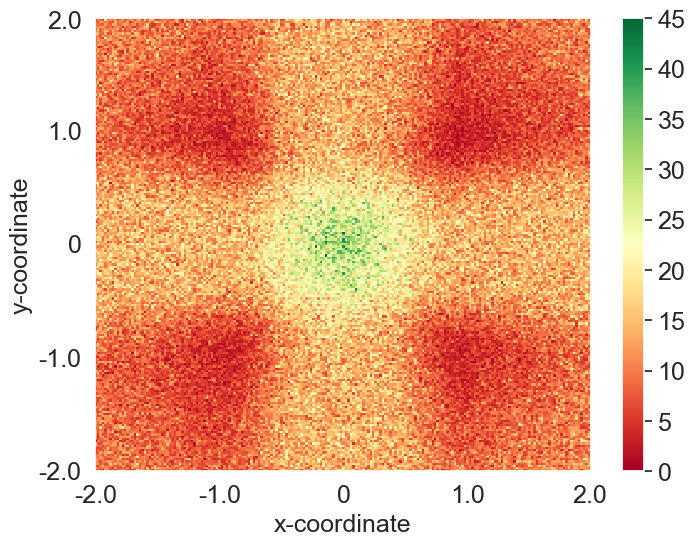

In [201]:
plot_XY(non_zero_x_big_cube, non_zero_y_big_cube, "RdYlGn", folder_saving_str_big_cube)

C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  if sys.path[0] == '':
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  del sys.path[0]
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  app.launch_new_instance()
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


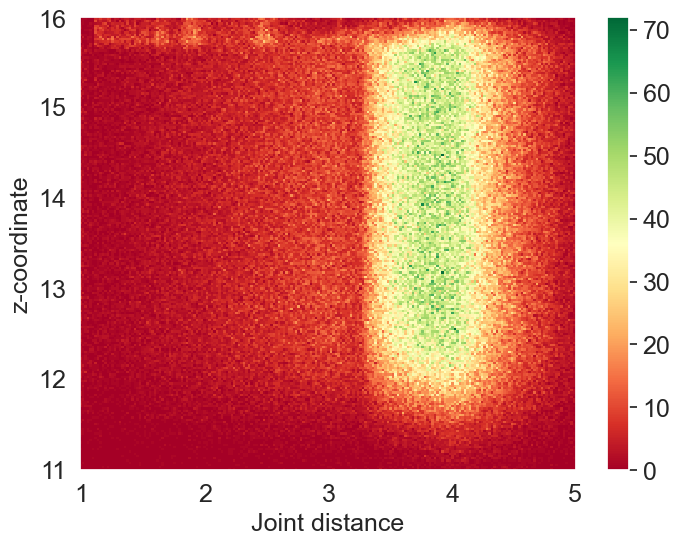

In [202]:
plot_ZJ(non_zero_z_big_cube, long_dist_big_cube, "RdYlGn", folder_saving_str_big_cube)

C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  if sys.path[0] == '':
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  del sys.path[0]
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  app.launch_new_instance()
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


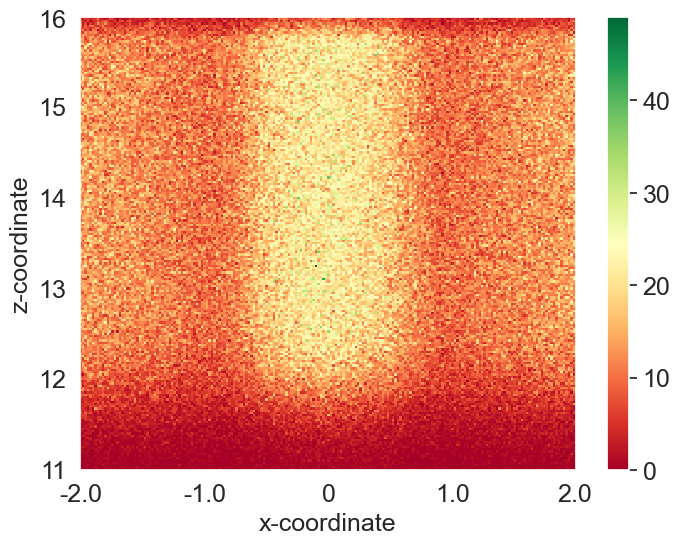

In [203]:
plot_ZX(non_zero_x_big_cube, non_zero_z_big_cube, "RdYlGn", folder_saving_str_big_cube)

C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  from ipykernel import kernelapp as app
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


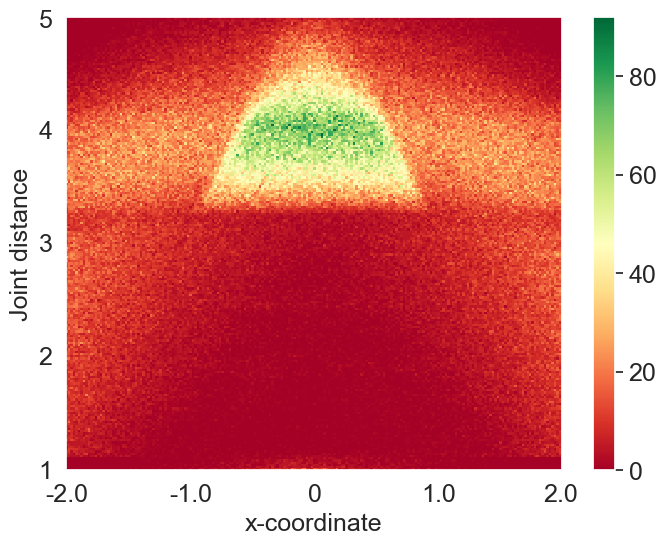

In [204]:
plot_JX(non_zero_x_big_cube, long_dist_big_cube, "RdYlGn", folder_saving_str_big_cube)

# Plot for medium cube 

C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  if sys.path[0] == '':
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  del sys.path[0]
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  app.launch_new_instance()
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


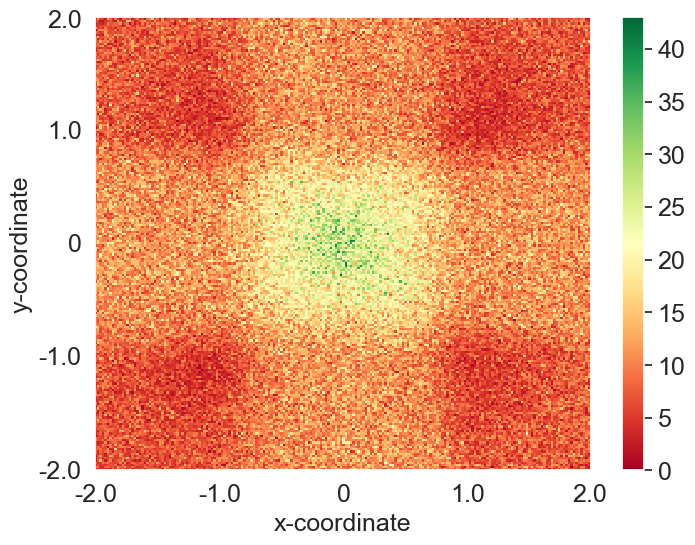

In [205]:
plot_XY(non_zero_x_medium_cube, non_zero_y_medium_cube, "RdYlGn", folder_saving_str_medium_cube)

C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  if sys.path[0] == '':
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  del sys.path[0]
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  app.launch_new_instance()
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


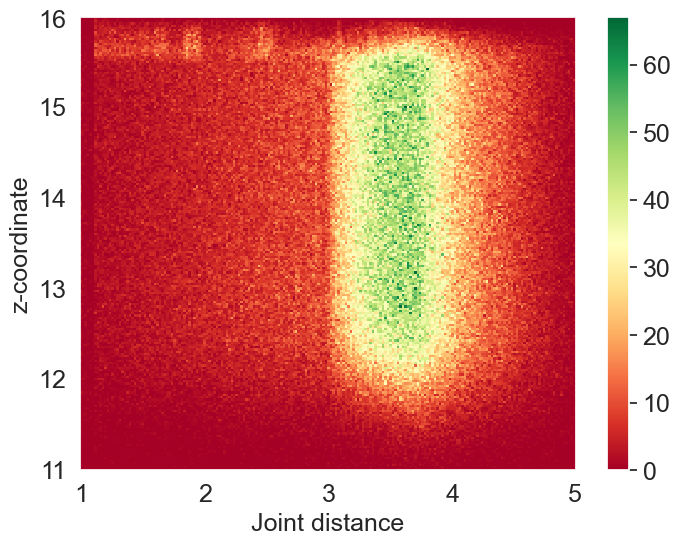

In [206]:
plot_ZJ(non_zero_z_medium_cube, long_dist_medium_cube, "RdYlGn", folder_saving_str_medium_cube)

C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  if sys.path[0] == '':
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  del sys.path[0]
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  app.launch_new_instance()
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


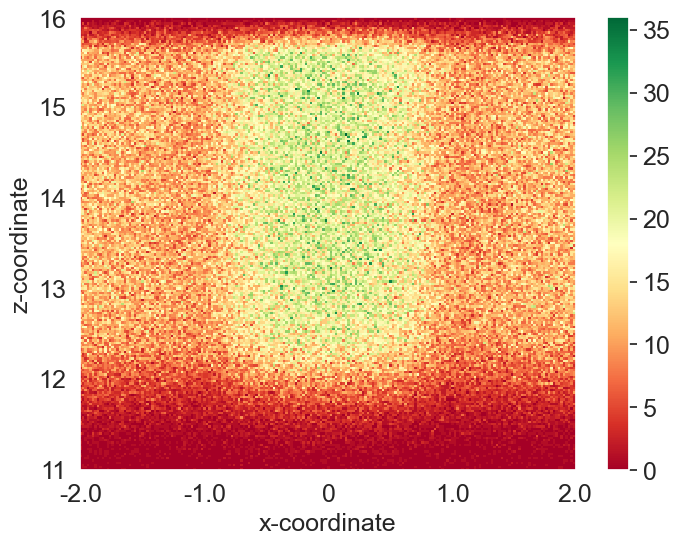

In [207]:
plot_ZX(non_zero_x_medium_cube, non_zero_z_medium_cube, "RdYlGn", folder_saving_str_medium_cube)

C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  from ipykernel import kernelapp as app
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


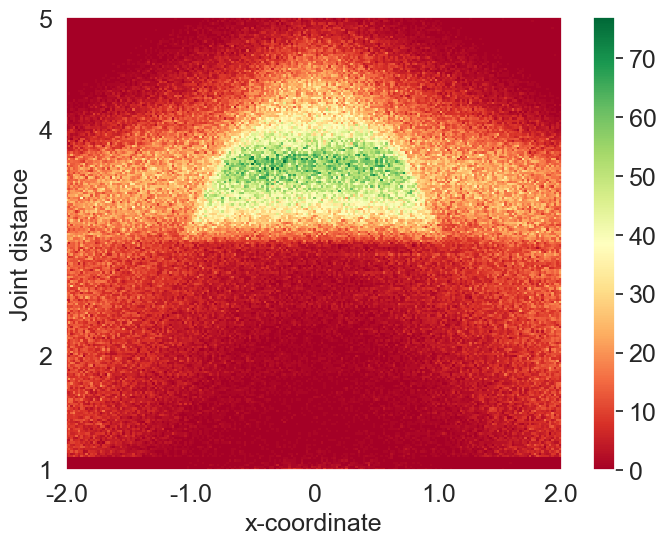

In [208]:
plot_JX(non_zero_x_medium_cube, long_dist_medium_cube, "RdYlGn", folder_saving_str_medium_cube)

# Plot for small cube 

C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  if sys.path[0] == '':
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  del sys.path[0]
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  app.launch_new_instance()
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


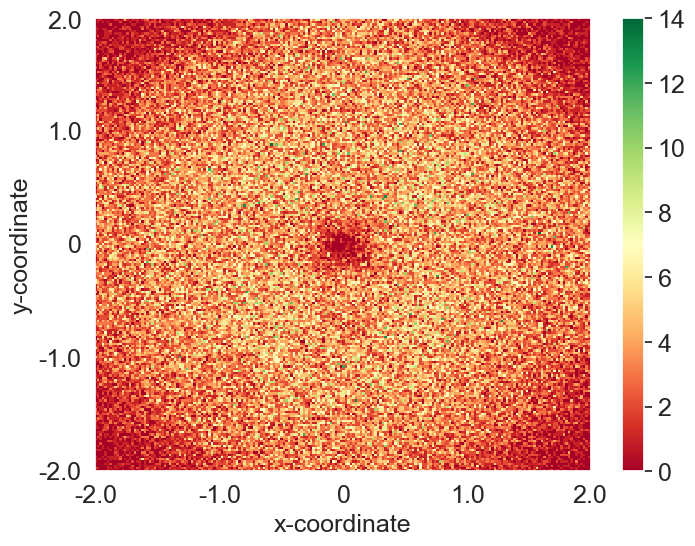

In [209]:
plot_XY(non_zero_x_small_cube, non_zero_y_small_cube, "RdYlGn", folder_saving_str_small_cube)

C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  if sys.path[0] == '':
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  del sys.path[0]
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  app.launch_new_instance()
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


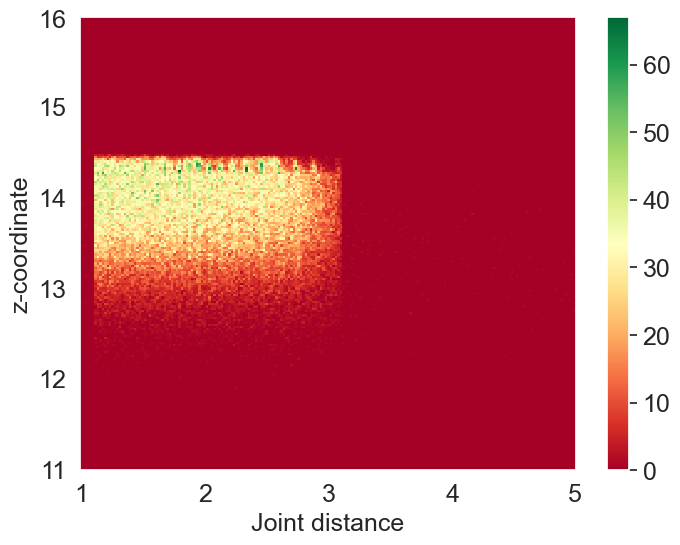

In [210]:
plot_ZJ(non_zero_z_small_cube, long_dist_small_cube, "RdYlGn", folder_saving_str_small_cube)

C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  if sys.path[0] == '':
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  del sys.path[0]
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  app.launch_new_instance()
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


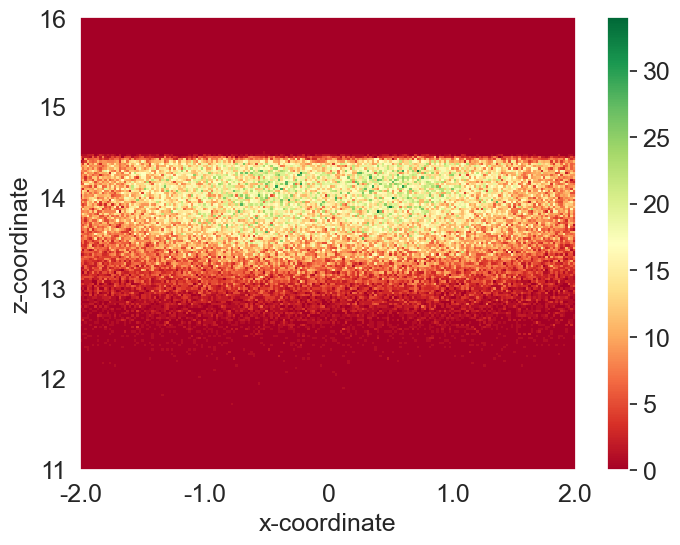

In [211]:
plot_ZX(non_zero_x_small_cube, non_zero_z_small_cube, "RdYlGn", folder_saving_str_small_cube)

C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  from ipykernel import kernelapp as app
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


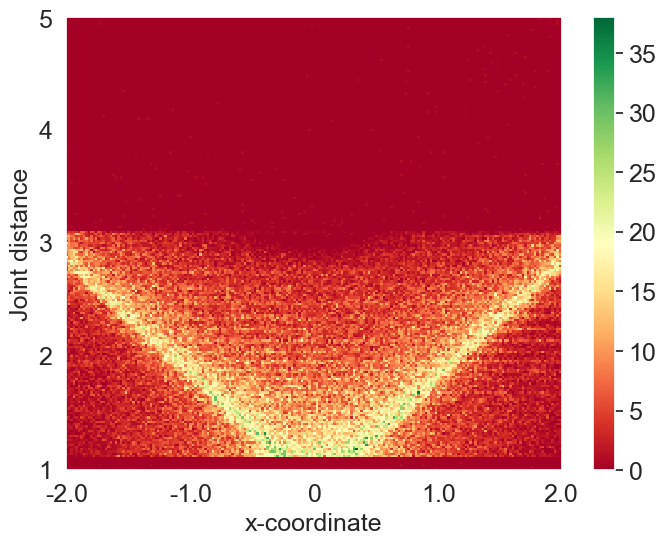

In [212]:
plot_JX(non_zero_x_small_cube, long_dist_small_cube, "RdYlGn", folder_saving_str_small_cube)

# Plot for cylinder

C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  if sys.path[0] == '':
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  del sys.path[0]
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  app.launch_new_instance()
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


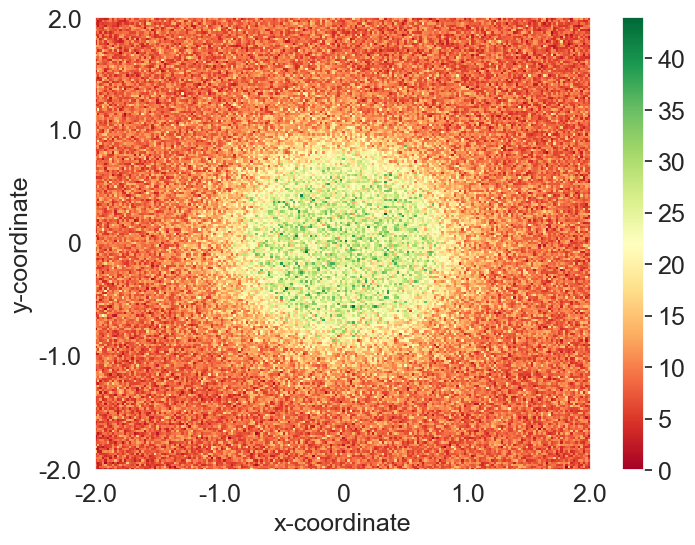

In [213]:
plot_XY(non_zero_x_cyli, non_zero_y_cyli, "RdYlGn", folder_saving_str_cyli)

C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  if sys.path[0] == '':
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  del sys.path[0]
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  app.launch_new_instance()
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


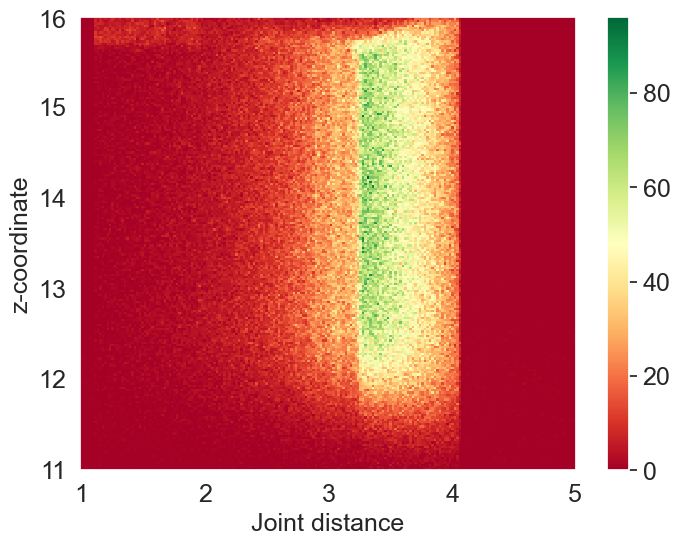

In [214]:
plot_ZJ(non_zero_z_cyli, long_dist_cyli, "RdYlGn", folder_saving_str_cyli)

C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  if sys.path[0] == '':
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  del sys.path[0]
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  app.launch_new_instance()
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


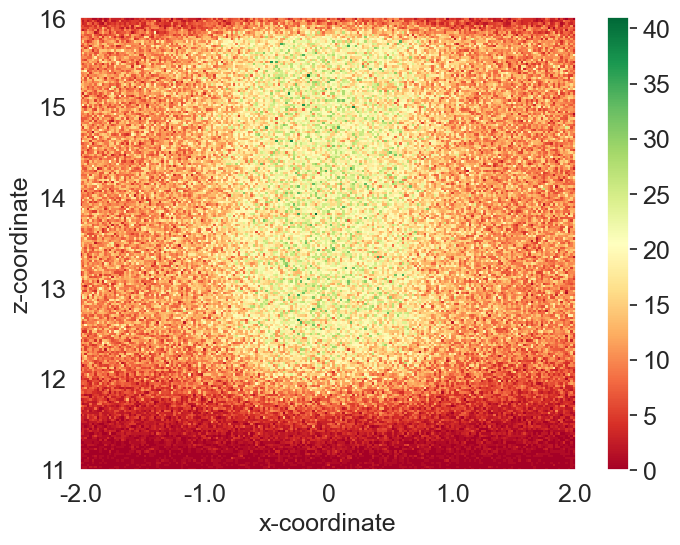

In [215]:
plot_ZX(non_zero_x_cyli, non_zero_z_cyli, "RdYlGn", folder_saving_str_cyli)

C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  from ipykernel import kernelapp as app
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
C:\Users\phili\anaconda3\envs\bayesian_opt\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


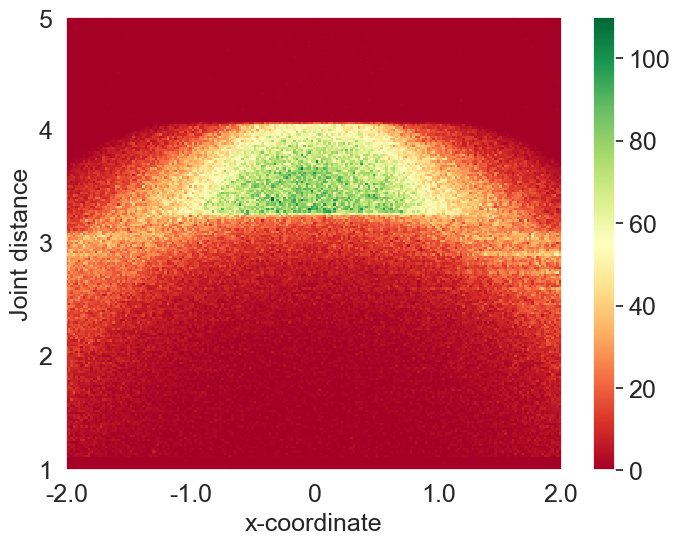

In [216]:
plot_JX(non_zero_x_cyli, long_dist_cyli, "RdYlGn", folder_saving_str_cyli)